### Introduction to Unsupervised Learning

- Unsupervised Learning is a type of Machine learning to draw inferences from unlabelled datasets.
- Model tries to find relationship between data.
- Most common unsupervised learning method is **clustering** which is used for exploratory data analysis to find hidden patterns or grouping in data


###  Clustering applications:
- Automatically organizing the data
- Recommendation engines
- Search result grouping
- Understanding hidden structure of data
- News Clustering for grouping similar news together
- Customer Segmentation
- Social network analysis
- Anomaly detection

###  Types of Clustering:

- ** Hard Clustering: ** <br>
In hard clustering, each data point either belongs to a cluster completely or not.(e.g. k-means algorithm)

- ** Soft Clustering: ** <br>
In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned.(fuzzy c-means algorithm)


###  Types of Clustering Algorithms:
There are a huge number of types for clustering algorithms. The following overview will only list the most prominent examples of clustering algorithms.

- ** Partitioning clustering (Centroid based medels): ** <br>
Partitioning algorithms are clustering techniques that subdivide the data sets into a set of k groups, where k is the number of groups pre-specified by the analyst. There are different types of partitioning clustering methods. The most popular one is the **K-means** algorithm. 

- ** Hierarchical clustering (Connectivity based models): ** <br>
Hierarchical clustering is an alternative approach to partitioning clustering for identifying groups in the dataset. It does not require to pre-specify the number of clusters to be generated.
The result of hierarchical clustering is a tree-based representation of the objects, which is also known as dendrogram. Observations can be subdivided into groups by cutting the dendrogram at a desired similarity level.

- ** Density based models: ** <br>
In this clustering model there will be a searching of data space for areas of varied density of data points in the data space . It isolates various density regions based on different densities present in the data space. Popular examples of density models are DBSCAN and OPTICS.

- ** Distribution based models: ** <br>
These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For instance: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.




### Distance or Similarity Functions:

- Minkowiski breed of distance calculation: 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4060cc840aeab9e41b5e47356088889e2e7a6f0f">
<br>

- Manhatten (p=1)
<br> <br>
<h1><center> $ d(x,y) = \sum_{i=1}^n |x_i - y_i| $ </center></h1>
<br>
- Euclidean (p=2)
<br>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4efcba672e6df32cc8eb7ce0863591806a6581b5">
<br>
- Cosine(Suitable for text data): <br>
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d"> 


array([2, 1, 2, ..., 0, 2, 0])

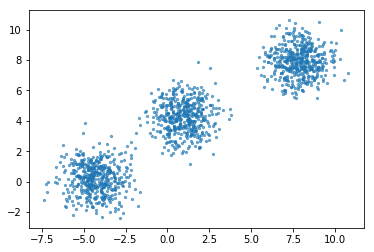

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

x,y = make_blobs(n_features=2, n_samples=1400, centers=3, cluster_std=1, random_state=3)
plt.scatter(x[:,0], x[:,1], s=5, alpha=.6)

# ![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/617px-K-means_convergence.gif)

## K-Means Clustering

K-Means clustering intends to partition n objects into k clusters in which each object belongs to the cluster with the nearest mean. This method produces exactly k different clusters of greatest possible distinction. The best number of clusters k leading to the greatest separation (distance) is not known as a priori and must be computed from the data. The objective of K-Means clustering is to minimize total intra-cluster variance, or, the squared error function: 

### Algorithm:
1. Clusters the data into k groups where k  is predefined.
2. Select k points at random as cluster centers.
3. Assign objects to their closest cluster center according to the Euclidean distance function.
4. Calculate the centroid or mean of all objects in each cluster.
5. Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.

<img src="https://stanford.edu/~cpiech/cs221/img/kmeansViz.png">

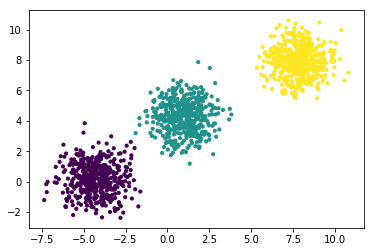

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
plt.scatter(x[:,0], x[:,1],s=10, c=kmeans.predict(x))

In [37]:
# Solving incompatible labels issue.
# y[y==1] = -1
# y[y==0] = 1
# y[y==-1] = 0
z = abs(kmeans.predict(x) - y)
z = np.sum(z)
print('Error: ' + str((z)/(len(y))))

Error: 0.0007142857142857143


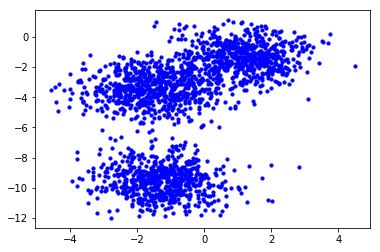

In [64]:
from sklearn.datasets import make_blobs, make_moons
np.random.seed(2) # do not change this line!
x,y = make_blobs(n_features=2, n_samples=2000, cluster_std=1)
plt.scatter(x[:,0], x[:,1],s=10, c='blue')

### What is the best choice of k for the above example?
k is the most important parameter in k-means.
## Elbow method
1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
2. For each k, calculate the total within-cluster sum of square (wss).
3. Plot the curve of wss according to the number of clusters k.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.



In [70]:
from scipy.spatial.distance import cdist
K = np.arange(1,11)
error = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(x)
    kmeans.fit(x)
    error.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

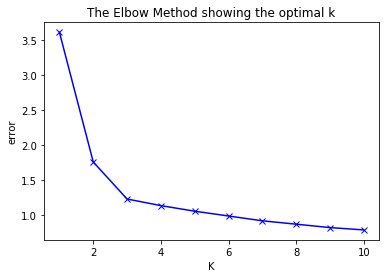

In [71]:
plt.plot(K, error, 'bx-')
plt.xlabel('K')
plt.ylabel('error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

That point is the optimal value for K. In the image above, K=3.

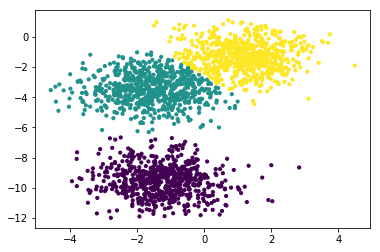

In [72]:
kmeans = KMeans(n_clusters=3).fit(x)
kmeans.fit(x)
plt.scatter(x[:,0], x[:,1],s=10, c=kmeans.predict(x))

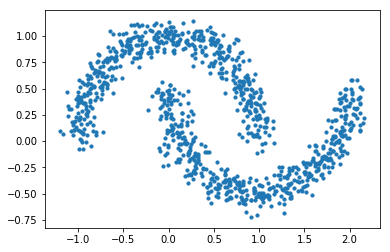

In [73]:
x, y = make_moons(n_samples=1000, noise=.09)
plt.scatter(x[:,0], x[:,1],s=10)

Obviously, k=2 is the best option!

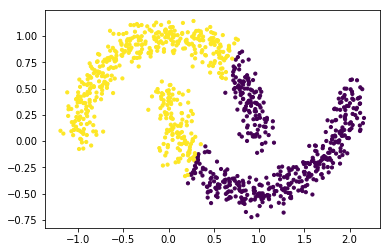

In [75]:
kmeans = KMeans(n_clusters=2).fit(x)
kmeans.fit(x)
plt.scatter(x[:,0], x[:,1],s=10, c=kmeans.predict(x))

OOPS! k-means did not work well for the previous example!

#### Limitations of K-Means:
- Assumes that clusters are convex & behaves poorly for elongated clusters.
- Probability for participation of data to multiple clusters.
- KMeans tries to find local minima and this depends on init value.



#### Meanshift
- Centroid based clustering algorithm.
- Mode can be understood as highest density of data points.

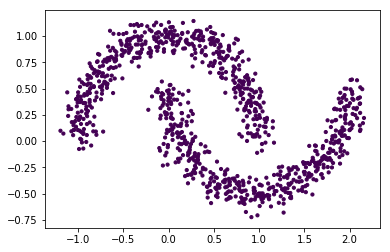

In [79]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(x)
plt.scatter(x[:,0], x[:,1],s=10, c=ms.predict(x))

## Hierarchial Clustering
Two types of hierarchaial Clustering
1. Agglomerative method, a botton-up approach.
2. Divisive method, a top-down approach.

### Agglomerative method

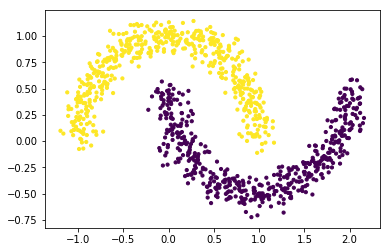

In [82]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(linkage='single')
agc.fit(x)
plt.scatter(x[:,0], x[:,1],s=10, c=agc.labels_)

### Density Based Clustering
####  DBSCAN (Density-based spatial clustering of applications with noise)
DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points.

DBSCAN parameters:

- **eps** : specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.

if the eps value chosen is too small, a large part of the data will not be clustered. It will be considered outliers because don’t satisfy the number of points to create a dense region. On the other hand, if the value that was chosen is too high, clusters will merge and the majority of objects will be in the same cluster. The eps should be chosen based on the distance of the dataset (we can use a k-distance graph to find it), but in general small eps values are preferable.

- ** min_samples **: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

As a general rule, a minimum minPoints can be derived from a number of dimensions (D) in the data set, as minPoints ≥ D + 1. Larger values are usually better for data sets with noise and will form more significant clusters. The minimum value for the minPoints must be 3, but the larger the data set, the larger the minPoints value that should be chosen.


#### Algorithm:
1. Divides the dataset into n dimensions.
2. For each point in the dataset, DBSCAN forms an n dimensional shape around that data point, and then counts how many data points fall within that shape.
3. DBSCAN counts this shape as a cluster. DBSCAN iteratively expands the cluster, by going through each individual point within the cluster, and counting the number of other data points nearby. 


** DBSCAN does NOT necessarily categorize every data point, and is therefore terrific with handling outliers in the dataset. **

<img src="https://miro.medium.com/max/700/1*3tq9JEQzZX41JxwUYh_lzw.png" />

The left image depicts a more traditional clustering method, such as K-Means, that does not account for multi-dimensionality. Whereas the right image shows how DBSCAN can contort the data into different shapes and dimensions in order to find similar clusters. We also notice in the right image, that the points along the outer edge of the dataset are not classified, suggesting they are outliers amongst the data.


### Silhouette Score a metric for measuring dbscan performance:
The silhouette score is calculated utilizing the mean intra- cluster distance between points, and the mean nearest-cluster distance. For instance, a cluster with a lot of data points very close to each other (high density) and is far away from the next nearest cluster (suggesting the cluster is very unique in comparison to the next closest), will have a strong silhouette score. A silhouette score ranges from -1 to 1, with -1 being the worst score possible and 1 being the best score. Silhouette scores of 0 suggest overlapping clusters.

Number of clusters: 1


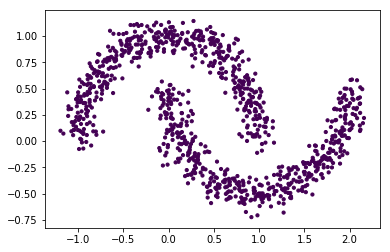

In [98]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters: ' + str(n_clusters))

if n_clusters > 1: # silhouette_score requires more than 1 cluster labels.
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(x, labels))

plt.scatter(x[:,0], x[:,1],s=10,c=labels)

** We should normalize the data! **

Number of clusters: 2
Silhouette Coefficient: 0.326


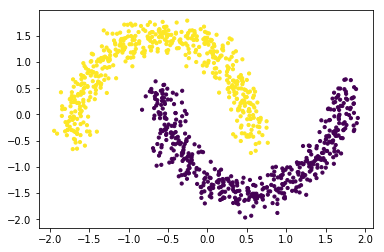

In [99]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters: ' + str(n_clusters))

if n_clusters > 1: 
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(x, labels))
    
plt.scatter(X[:,0], X[:,1],s=10,c=labels)

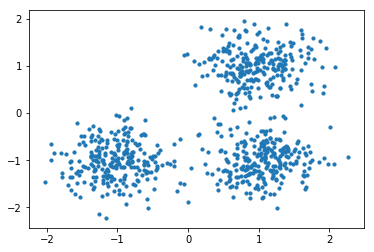

In [100]:
centers = [[1, 1], [-1, -1], [1, -1]]
x, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(x[:,0], x[:,1],s=10)

Number of clusters: 3
Silhouette Coefficient: 0.626


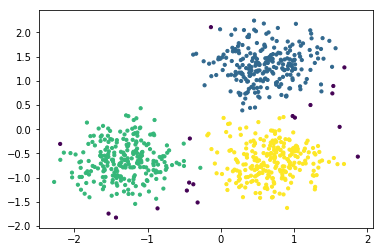

In [101]:
X = StandardScaler().fit_transform(x)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters: ' + str(n_clusters))

if n_clusters > 1: 
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(x, labels))
    
plt.scatter(X[:,0], X[:,1],s=10,c=labels)

** Purple points were not classified and recognized as outliers! **

<h1><center> Clustering Methods Comparison </center></h1>
<img src="https://miro.medium.com/max/700/1*yMQItROR9uD0-RLf7sFp4g.png" />